# Homework 1: Linear Algebra and Floating Point Arithmetic

## Direct Methods for the solution of Linear Systems.

### 1. Given a matrix $A ∈ \mathbb{R}^{n\times n}$ and the vector $x_{true} = (1,1,\ldots,1)^T \in \mathbb{R}^n$, write a script that:
* Computes the right-hand side of the linear system $b = Ax_{true}$.
* Computes the condition number in 2-norm of the matrix $A$. It is ill-conditioned? What if we use the $\infty$-norm instead of the 2-norm?
* Solves the linear system $Ax = b$ with the function `np.linalg.solve()`.
* Computes the relative error between the solution computed before and the true solution $x_true$.
Remember that the relative error between $x_{true}$ and $x$ in $\mathbb{R}^n$ can be computed as

$$E(x_{true}, x) = \frac{\lVert x − x_{true}\rVert_2}{\lVert x_{true}\rVert_2}$$

* Plot a graph (using `matplotlib.pyplot`) with the relative errors as a function of $n$ and (in a new
window) the condition number in 2-norm $K_2(A)$ and in $\infty$-norm, as a function of $n$

In [354]:
import numpy as np
import matplotlib.pyplot as plt

def solve_linear_system(A):
    n, m = A.shape
    if n != m:
        print("Not square matrix!")
        return
    x_true = np.ones(n)
    b = A.dot(x_true)
    K_norm_2 = np.linalg.cond(A, 2)
    K_norm_inf = np.linalg.cond(A, np.inf)
    x_sol = np.linalg.solve(A, b)
    rel_err = np.linalg.norm(x_sol - x_true)/np.linalg.norm(x_true)
    return rel_err, K_norm_2, K_norm_inf

def plot_graphs(n, rel_errs, K_norms_2, K_norms_inf):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].plot(n, rel_errs, marker='o')
    axs[0].set_xlabel('n')
    axs[0].set_ylabel('Relative Error')
    axs[0].set_title('Relative Errors as a Function of n')
    axs[0].grid(True)
    axs[0].set_yscale('log')
    
    axs[1].plot(n, K_norms_2, color='r', marker='s', label=r'$K_2(A)$')
    axs[1].plot(n, K_norms_inf, color='g', marker='^', label=r'$K_{\infty}(A)$')
    axs[1].set_xlabel('n')
    axs[1].set_ylabel('K(A)')
    axs[1].set_title(r'$K_{2}(A)$ and $K_{\infty}(A)$ as a Function of n')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].set_yscale('log')

    plt.tight_layout()
    plt.show()

In [355]:
solve_linear_system(np.array([[1,2],[3,4]]))

(0.0, 14.933034373659265, 20.999999999999993)

Using a $\infty$-norm to compute the condition number, as opposed to using the 2-norm, generally results in values that are within the same order of magnitude. The difference lies in computational complexity. Specifically, calculating the condition number using the $\infty$-norm involes finding the maximum absolute eigenvalue, which can be computationally expensive.

### 2. Test the program above with the following choices of $A \in \mathbb{R}^{n\times  n}$:
* A random matrix (created with the function `np.random.rand()`) with size varying with $n =\{10,20,30,\ldots,100\}$
* The Vandermonde matrix (`np.vander`) of dimension $n = \{5, 10, 15, 20, 25, 30\}$ with respect to the vector $x = \{1,2,3,\ldots,n\}$.
* The Hilbert matrix (`scipy.linalg.hilbert`) of dimension $n = \{4, 5, 6,\ldots, 12\}$.

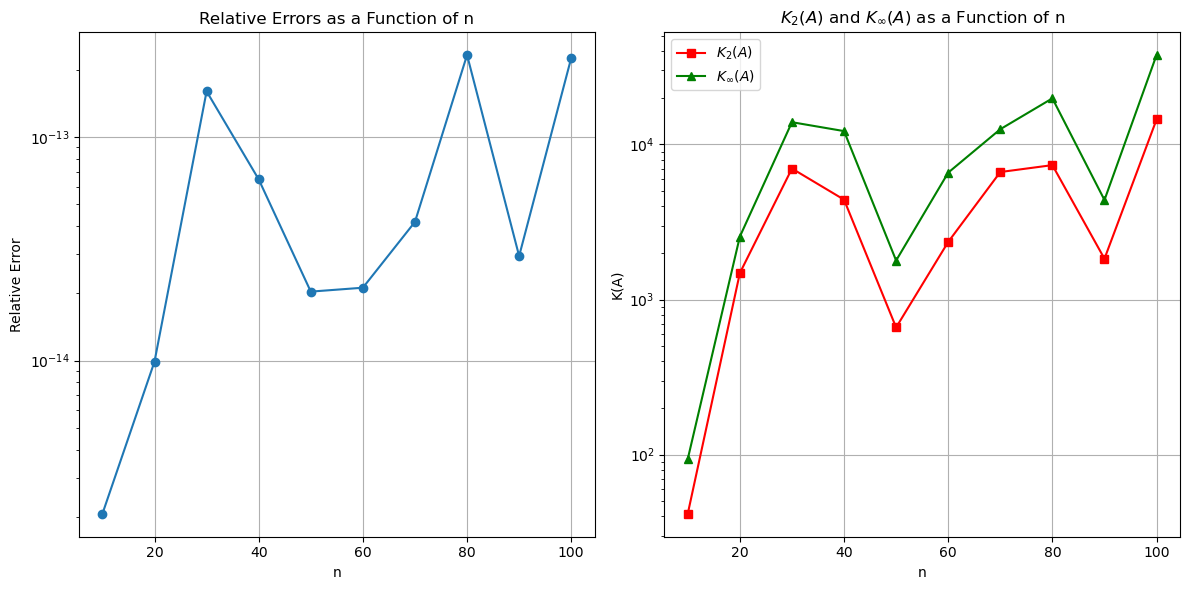

In [383]:
n_values=range(10,101,10)
results = [solve_linear_system(np.random.rand(n,n)) for n in n_values]
rel_errs, K_norms_2, K_norms_inf = zip(*results)

plot_graphs(n_values, rel_errs, K_norms_2, K_norms_inf)

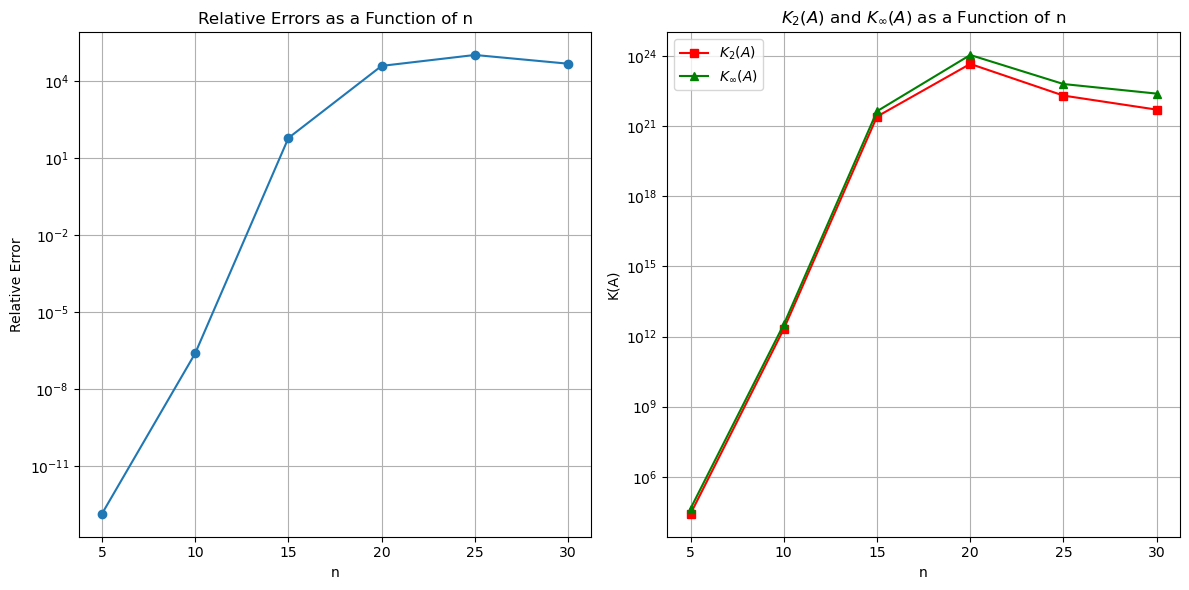

In [381]:
n_values=range(5,31,5)
results = [solve_linear_system(np.vander(np.arange(1,n+1))) for n in n_values]
rel_errs, K_norms_2, K_norms_inf = zip(*results)

plot_graphs(n_values, rel_errs, K_norms_2, K_norms_inf)

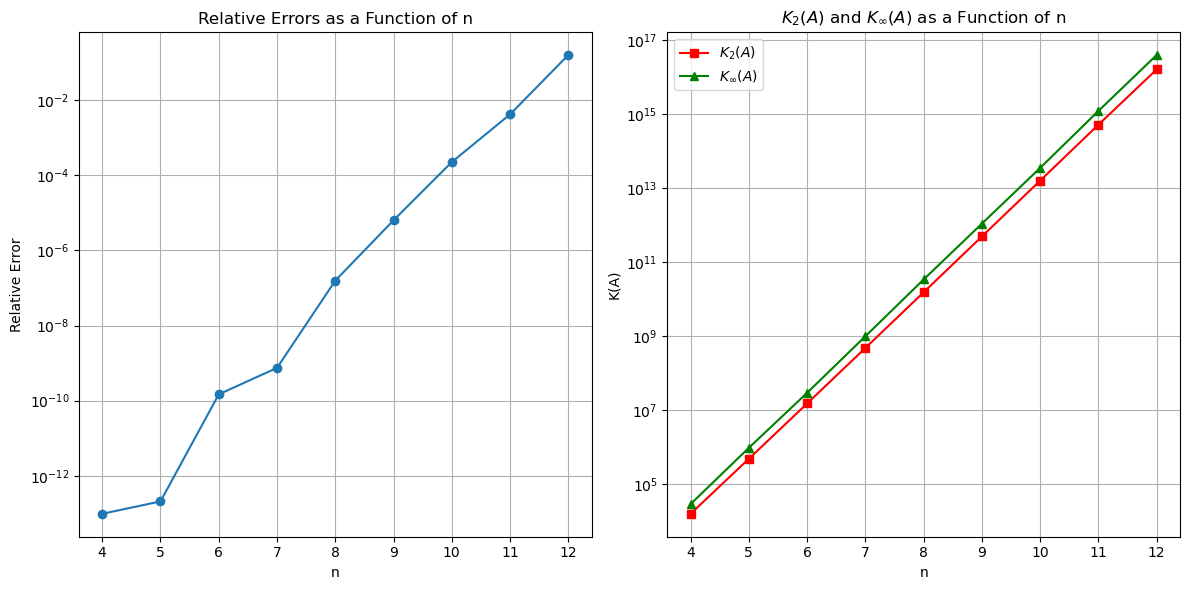

In [382]:
import scipy

n_values=range(4,13)
results = [solve_linear_system(scipy.linalg.hilbert(n)) for n in n_values]
rel_errs, K_norms_2, K_norms_inf = zip(*results)

plot_graphs(n_values, rel_errs, K_norms_2, K_norms_inf)

## Floating Point Arithmetic.

### 1. The Machine epsilon $\epsilon$ is the distance between 1 and the next floating point number. Compute $\epsilon$, which is defined as the smallest floating point number such that it holds:
$$\text{fl}(1 + \epsilon) > 1$$
*Tips*: use a `while` structure.

In [282]:
eps=2**(-52);
print(eps);

2.220446049250313e-16


In [294]:
eps = 1

while 1 + eps > 1:
    eps /= 2

eps *= 2

if 1 + eps > 1:
    print('Smallest Finite and Positive Number eps such that eps+1>1')
    print(eps)

Smallest Finite and Positive Number eps such that eps+1>1
2.220446049250313e-16


### 2. Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$ . It is well known that:
$$\lim_{n\to\infty} a_n =e$$
where $e$ is the Euler costant. Choose different values for $n$, compute $a_n$ and compare it to the real value of the Euler costant. What happens if you choose a large value of $n$? Guess the reason.

In [352]:
import math

def compute_e(n):
    e_approx = (1+1/n)**n
    abs_err = np.abs(e_approx - math.e)
    rel_err = abs_err/np.abs(math.e)
    return e_approx, abs_err, rel_err

n_values = 10**np.linspace(1,21,21)
results = [compute_e(n) for n in n_values]

for e_approx, abs_err, rel_err in results:
    print(f"e_approx: {e_approx}, abs_err: {abs_err}, rel_err: {rel_err}")

e_approx: 2.5937424601000023, abs_err: 0.12453936835904278, rel_err: 0.045815473235769066
e_approx: 2.7048138294215285, abs_err: 0.01346799903751661, rel_err: 0.004954599959619134
e_approx: 2.7169239322355936, abs_err: 0.0013578962234515046, rel_err: 0.0004995421038521516
e_approx: 2.7181459268249255, abs_err: 0.000135901634119584, rel_err: 4.999541721419838e-05
e_approx: 2.7182682371922975, abs_err: 1.359126674760347e-05, rel_err: 4.999947615920371e-06
e_approx: 2.7182804690957534, abs_err: 1.359363291708604e-06, rel_err: 5.000818081027336e-07
e_approx: 2.7182816941320818, abs_err: 1.3432696333026684e-07, rel_err: 4.941612820419539e-08
e_approx: 2.7182817983473577, abs_err: 3.011168736577474e-08, rel_err: 1.1077470720850393e-08
e_approx: 2.7182820520115603, abs_err: 2.2355251516614771e-07, rel_err: 8.224037435179281e-08
e_approx: 2.7182820532347876, abs_err: 2.2477574246337895e-07, rel_err: 8.26903745263239e-08
e_approx: 2.71828205335711, abs_err: 2.248980650598753e-07, rel_err: 8.273

When $n$ is very large number, $\frac{1}{n}$ becomes extremely small. At some point, this value becomes so small that isn't longer perceived due to rounding errors in the numerical approximation.

### 3. Let’s consider the matrices:
$$A=\begin{bmatrix}
4 & 2 \\
1 & 3
\end{bmatrix},\quad 
B=\begin{bmatrix}
4 & 2 \\
2 & 1
\end{bmatrix}
$$
Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples.

*Tips*: Please, have a look at `np.linalg`.

In [379]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])
C = np.array([[1, 2], [3, 6]])

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
rank_C = np.linalg.matrix_rank(C)

eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_B = np.linalg.eigvals(B)
eigenvalues_C = np.linalg.eigvals(C)

print(f"rank A: {rank_A}, rank B: {rank_B}, rank C: {rank_C}")
print(f"Eigenvalues of A: {eigenvalues_A}, Eigenvalues of B: {eigenvalues_B}, Eigenvalues of C: {eigenvalues_C}")

rank A: 2, rank B: 1, rank C: 1
Eigenvalues of A: [5. 2.], Eigenvalues of B: [5. 0.], Eigenvalues of C: [0. 7.]


* A matrix is full-rank if and only if all its eigenvalues are non-zero and viceversa.